In [1]:
import nlpia
from nlpia.book.examples.ch04_catdog_lsa_3x6x16 import word_topic_vectors
word_topic_vectors.T.round(1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pugnlp/util.py:80: FutureWarning: The pandas.np modul

,cat,dog,apple,lion,nyc,love
top0,-0.6,-0.4,0.5,-0.3,0.4,-0.1
top1,-0.1,-0.3,-0.4,-0.1,0.1,0.8
top2,-0.3,0.8,-0.1,-0.5,0.0,0.1


In [2]:
from nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models, prettify_tdm
bow_svd, tfidf_svd = lsa_models()

100%|██████████| 263/263 [00:00<00:00, 219872.82it/s]


In [5]:
bow_svd

{'u':               0             1         2             3         4         5
 cat   -0.039756  8.340577e-01 -0.381852 -2.360883e-16  0.112957 -0.379733
 dog   -0.004478  2.085144e-01 -0.178460 -7.071068e-01 -0.390368  0.521792
 apple -0.617386 -2.085144e-01 -0.513476  2.646276e-16  0.489451  0.268583
 lion  -0.004478  2.085144e-01 -0.178460  7.071068e-01 -0.390368  0.521792
 nyc   -0.752810  6.245005e-16  0.238804 -2.775558e-16 -0.524858 -0.317449
 love  -0.224703  4.170288e-01  0.685426  3.048230e-16  0.409180  0.371966,
 's': array([3.14283392, 2.23606798, 1.77192093, 1.        , 0.84299447,
        0.52177724]),
 'vt':                0             1             2             3             4             5             6             7   \
 d0  -4.359745e-01 -4.359745e-01 -3.110292e-01 -4.359745e-01 -4.359745e-01 -1.964423e-01 -1.264961e-02 -1.407453e-02   
 d1  -9.325048e-02 -9.325048e-02  1.865010e-01 -9.325048e-02 -9.325048e-02 -9.325048e-02  3.730019e-01  4.662524e-01   
 d2  -1.

In [3]:
prettify_tdm(**bow_svd)

,cat,dog,apple,lion,nyc,love,text
0,,,1,,1,,NYC is the Big Apple.
1,,,1,,1,,NYC is known as the Big Apple.
2,,,,,1,1,I love NYC!
3,,,1,,1,,I wore a hat to the Big Apple party in NYC.
4,,,1,,1,,Come to NYC. See the Big Apple!
5,,,1,,,,Manhattan is called the Big Apple.
6,1,,,,,,New York is a big city for a small cat.
7,1,,,1,,,"The lion, a big cat, is the king of the jungle."
8,1,,,,,1,I love my pet cat.
9,,,,,1,1,I love New York City (NYC).


In [4]:
tdm = bow_svd['tdm']
tdm

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


# 左奇异向量U

U矩阵包含词项-主题矩阵。

In [6]:
import numpy as np
U,s,Vt = np.linalg.svd(tdm)

In [7]:
import pandas as pd
pd.DataFrame(U, index = tdm.index).round(2)

,0,1,2,3,4,5
cat,-0.04,0.83,-0.38,-0.00,0.11,-0.38
dog,-0.00,0.21,-0.18,-0.71,-0.39,0.52
apple,-0.62,-0.21,-0.51,0.00,0.49,0.27
lion,-0.00,0.21,-0.18,0.71,-0.39,0.52
nyc,-0.75,0.00,0.24,-0.00,-0.52,-0.32
love,-0.22,0.42,0.69,0.00,0.41,0.37


U矩阵的每一列可以看作词-主题向量的转换因子

# 奇异值S

In [8]:
s.round(1)

array([3.1, 2.2, 1.8, 1. , 0.8, 0.5])

In [9]:
S = np.zeros((len(U),len(Vt)))
pd.np.fill_diagonal(S,s)
pd.DataFrame(S).round(1)

<ipython-input-9-50e8ef2b67ed>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.fill_diagonal(S,s)


,0,1,2,3,4,5,6,7,8,9,10
0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


对角线的元素就是奇异值（特征值）。奇异值给出了在新的主题向量空间中每个维度所代表的信息量。第一个维度包含语料最多的信息

# 右奇异向量

In [10]:
pd.DataFrame(Vt).round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.44,-0.44,-0.31,-0.44,-0.44,-0.20,-0.01,-0.01,-0.08,-0.31,-0.01
1,-0.09,-0.09,0.19,-0.09,-0.09,-0.09,0.37,0.47,0.56,0.19,0.47
2,-0.16,-0.16,0.52,-0.16,-0.16,-0.29,-0.22,-0.32,0.17,0.52,-0.32
3,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.71,-0.00,-0.00,-0.71
4,-0.04,-0.04,-0.14,-0.04,-0.04,0.58,0.13,-0.33,0.62,-0.14,-0.33
5,-0.09,-0.09,0.10,-0.09,-0.09,0.51,-0.73,0.27,-0.01,0.10,0.27
6,-0.57,0.21,0.11,0.33,-0.31,0.34,0.34,0.00,-0.34,0.23,0.00
7,-0.32,0.47,0.25,-0.63,0.41,0.07,0.07,0.00,-0.07,-0.18,0.00
8,-0.50,0.29,-0.20,0.41,0.16,-0.37,-0.37,-0.00,0.37,-0.17,0.00
9,-0.15,-0.15,-0.59,-0.15,0.42,0.04,0.04,-0.00,-0.04,0.63,-0.00


# 主成分分析

In [12]:
import pandas as pd 
pd.set_option('display.max_columns',6)
from sklearn.decomposition import PCA
import seaborn
from matplotlib import pyplot as plt
from nlpia.data.loaders import get_data

In [13]:
df = get_data('pointcloud').sample(1000)
pca = PCA(n_components = 2)
df2d = pd.DataFrame(pca.fit_transform(df), columns = list('xy'))

In [15]:
df

,x,y,z
45885,0.016540,0.005929,-0.018202
40435,-0.018490,0.077126,0.066769
7757,0.033317,0.007672,0.012250
2274,0.021038,0.018679,-0.023588
21486,-0.003547,-0.069471,0.011244
...,...,...,...
23886,0.004132,-0.071993,0.022503
30603,0.029381,-0.061629,-0.039472
24447,-0.006737,0.027987,0.024663
27766,0.030924,0.011092,-0.074907


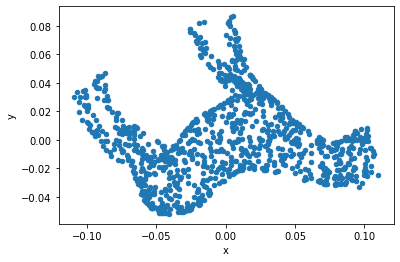

In [14]:
df2d.plot(kind = 'scatter', x = 'x', y = 'y')
plt.show()